Chapter 04
# 经验累积分布函数
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

In [2]:
# Load the iris data
iris_sns = sns.load_dataset("iris") 
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

<Axes: ylabel='Density'>

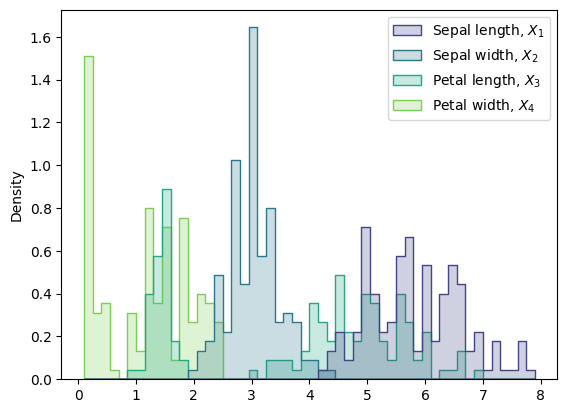

In [3]:
#%% Histograms PDF

fig, ax = plt.subplots()


sns.histplot(data=X_df, palette = "viridis",fill = True,
             binwidth = 0.15,element="step",stat="density",
             cumulative=False, common_norm=False)

<Axes: ylabel='Proportion'>

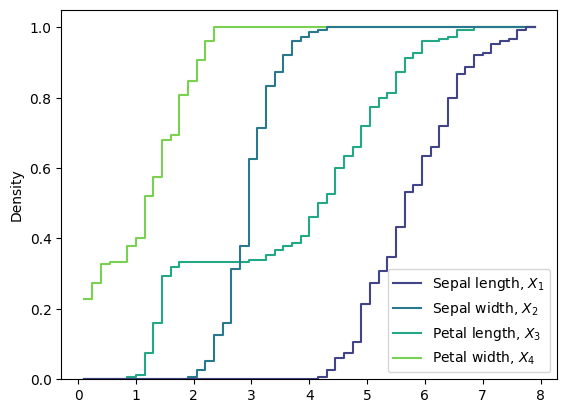

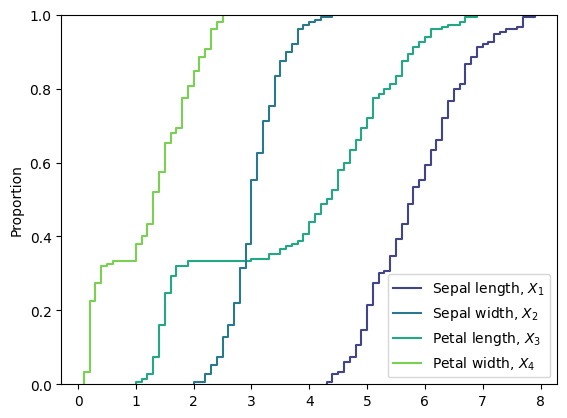

In [4]:
#%% CDF plot

fig, ax = plt.subplots()

sns.histplot(data=X_df, palette = "viridis",fill = False,
             binwidth = 0.15,element="step",stat="density",
             cumulative=True, common_norm=False)

fig, ax = plt.subplots()
sns.ecdfplot(data=X_df, palette = "viridis")

#%% convert data to emperical CDF

In [5]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=len(X_df), 
                         random_state=0)
ecdf = qt.fit_transform(X_df)
ecdf_df = pd.DataFrame(ecdf, 
                       columns = X_df.columns)

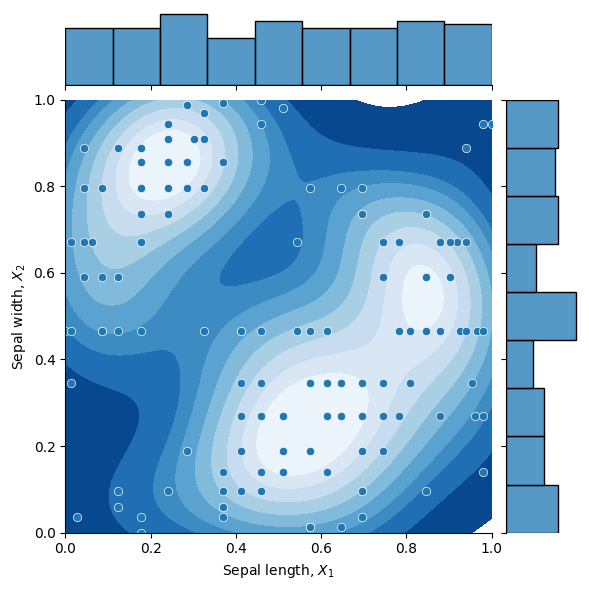

In [6]:
g = sns.jointplot(data=ecdf_df, x=feature_names[0], 
                  y=feature_names[1],
                  xlim = [0,1],ylim = [0,1])
g.plot_joint(sns.kdeplot, cmap="Blues_r", zorder=0, 
             levels=10, fill = True)

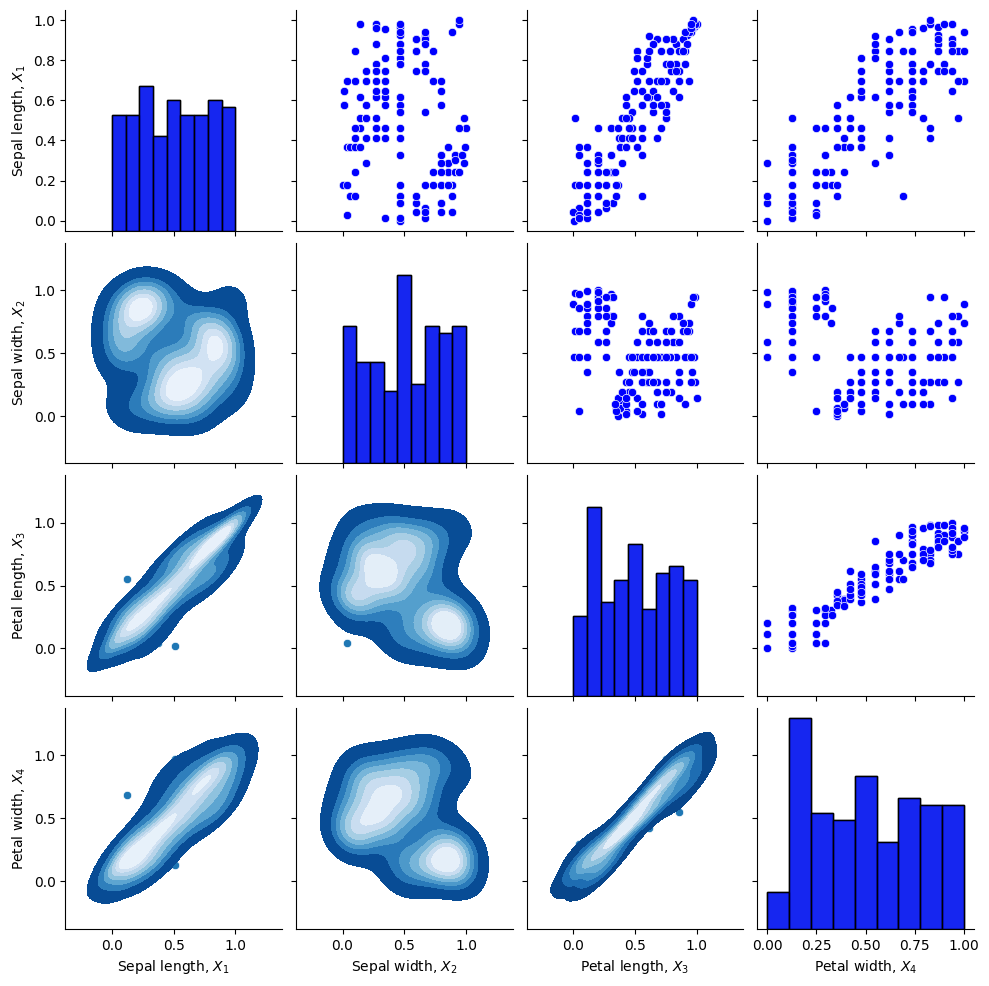

In [7]:
#%% Pairplot of the emperical data

# with no class labels
g = sns.pairplot(ecdf_df)
g.map_upper(sns.scatterplot, color = 'b')
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_r") 
g.map_diag(sns.histplot, kde=False, color = 'b')